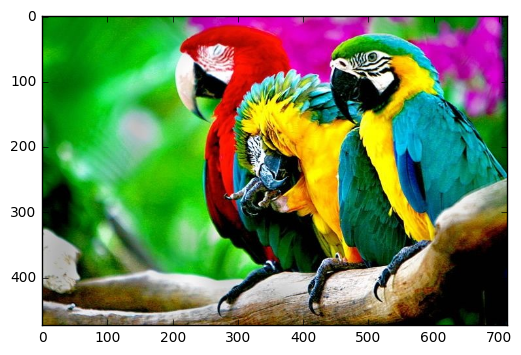

In [48]:
from skimage.io import imread
image = imread('parrots.jpg')
import pylab
%matplotlib inline
pylab.imshow(image)

In [49]:
import skimage
import pandas as pd
import numpy as np
norm_image = skimage.img_as_float(image=image)
data = np.reshape(norm_image, (image.shape[0]*image.shape[1], 3))
data = pd.DataFrame(data=data)
print(data[:3])

          0         1         2
0  0.011765  0.490196  0.015686
1  0.011765  0.490196  0.015686
2  0.007843  0.494118  0.007843


In [50]:
from sklearn.cluster import KMeans
clf = KMeans(init='k-means++', random_state=241)
clusters = clf.fit(data.values, data.index)
labels = clusters.labels_
clustered_data = data.copy()
clustered_data['cluster'] = labels
print(clustered_data[:3])

          0         1         2  cluster
0  0.011765  0.490196  0.015686        0
1  0.011765  0.490196  0.015686        0
2  0.007843  0.494118  0.007843        0


In [55]:
mean_cluster = clustered_data.groupby('cluster').mean().values
median_cluster = clustered_data.groupby('cluster').median().values
mean_data = [mean_cluster[cluster] for cluster in clustered_data['cluster'].values]
med_data = [median_cluster[cluster] for cluster in clustered_data['cluster'].values]
med_image = np.reshape(med_data, (image.shape[0], image.shape[1], 3))
mean_image = np.reshape(mean_data, (image.shape[0], image.shape[1], 3))

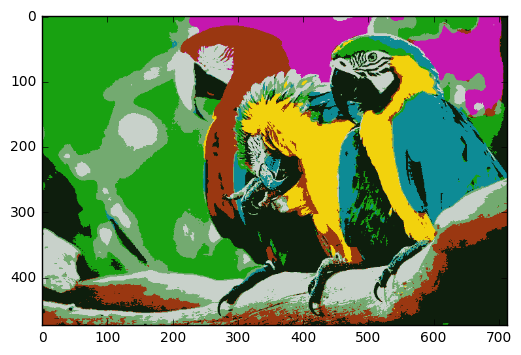

In [56]:
def 